In [2]:
import pandas_datareader.data as web
import datetime
import time
import pandas as pd
from selenium import webdriver
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import random

In [3]:
df = pd.read_csv("/Users/juliocarvalho/Desktop/PosMapa/Bolsab3/IBOVDia_10-11-22.csv",error_bad_lines=False, sep=';', skiprows=1)
df.head()
df.info()
df.index[:-2]

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, RRRP3 to Redutor
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo         92 non-null     object 
 1   Acao           92 non-null     object 
 2   Tipo           94 non-null     object 
 3   Qtde.STeorica  93 non-null     object 
 4   Part.(%)       0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 4.4+ KB


/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_5764/3292458390.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/Users/juliocarvalho/Desktop/PosMapa/Bolsab3/IBOVDia_10-11-22.csv",error_bad_lines=False, sep=';', skiprows=1)


Index(['RRRP3', 'ALPA4', 'ABEV3', 'AMER3', 'ARZZ3', 'ASAI3', 'AZUL4', 'B3SA3',
       'BPAN4', 'BBSE3', 'BRML3', 'BBDC3', 'BBDC4', 'BRAP4', 'BBAS3', 'BRKM5',
       'BRFS3', 'BPAC11', 'CRFB3', 'CCRO3', 'CMIG4', 'CIEL3', 'COGN3', 'CPLE6',
       'CSAN3', 'CPFE3', 'CMIN3', 'CVCB3', 'CYRE3', 'DXCO3', 'ECOR3', 'ELET3',
       'ELET6', 'EMBR3', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'EZTC3',
       'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'NTCO3', 'SOMA3', 'HAPV3', 'HYPE3',
       'IGTI11', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'RENT3',
       'LWSA3', 'LREN3', 'MGLU3', 'MRFG3', 'CASH3', 'BEEF3', 'MRVE3', 'MULT3',
       'PCAR3', 'PETR3', 'PETR4', 'PRIO3', 'PETZ3', 'POSI3', 'QUAL3', 'RADL3',
       'RAIZ4', 'RDOR3', 'RAIL3', 'SBSP3', 'SANB11', 'SMTO3', 'CSNA3', 'SLCE3',
       'SULA11', 'SUZB3', 'TAEE11', 'VIVT3', 'TIMS3', 'TOTS3', 'UGPA3',
       'USIM5', 'VALE3', 'VIIA3', 'VBBR3', 'WEGE3', 'YDUQ3'],
      dtype='object')

In [4]:
yf.pdr_override()
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 11, 29)

df_ibov = web.get_data_yahoo('^BVSP',start,end)

df_ibov.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-22,109750.0,110224.0,107867.0,109037.0,109037.0,15056500
2022-11-23,109036.0,109285.0,107902.0,108683.0,108683.0,13198400
2022-11-24,108846.0,112612.0,108846.0,111831.0,111831.0,10296900
2022-11-25,111831.0,112025.0,108552.0,108977.0,108977.0,12309100
2022-11-28,108977.0,109476.0,108378.0,108782.0,108782.0,11492600


In [5]:
options = webdriver.ChromeOptions()
prefs ={"download.default_directory":"Users/juliocarvalho/Desktop/PosMapa/Bolsab3"}

options.add_experimental_option("prefs",prefs)
driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=options)
driver.get ("https://sistemaswebb3-listados.b3.com.br/indexPage/day/IBOV?language=pt-br")

btn_download = driver.find_element("link text",'Download')
btn_download.click()

time.sleep(3)

driver.close()

/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_5764/2163298492.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=options)
/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_5764/2163298492.py:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path='/usr/local/bin/chromedriver', chrome_options=options)


In [6]:
df = pd.read_csv("/Users/juliocarvalho/Desktop/PosMapa/Bolsab3/IBOVDia_10-11-22.csv",error_bad_lines=False, sep=';', skiprows=1)
df.head()
df.info()
df.index[:-2]

ativos = list(df.index[:-2])
ativos = map(lambda a: f"{a}.SA", ativos)
ativos_sa =" ".join(list(ativos))

ativos_sa

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, RRRP3 to Redutor
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo         92 non-null     object 
 1   Acao           92 non-null     object 
 2   Tipo           94 non-null     object 
 3   Qtde.STeorica  93 non-null     object 
 4   Part.(%)       0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 4.4+ KB


/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_5764/318145461.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/Users/juliocarvalho/Desktop/PosMapa/Bolsab3/IBOVDia_10-11-22.csv",error_bad_lines=False, sep=';', skiprows=1)


'RRRP3.SA ALPA4.SA ABEV3.SA AMER3.SA ARZZ3.SA ASAI3.SA AZUL4.SA B3SA3.SA BPAN4.SA BBSE3.SA BRML3.SA BBDC3.SA BBDC4.SA BRAP4.SA BBAS3.SA BRKM5.SA BRFS3.SA BPAC11.SA CRFB3.SA CCRO3.SA CMIG4.SA CIEL3.SA COGN3.SA CPLE6.SA CSAN3.SA CPFE3.SA CMIN3.SA CVCB3.SA CYRE3.SA DXCO3.SA ECOR3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA ENGI11.SA ENEV3.SA EGIE3.SA EQTL3.SA EZTC3.SA FLRY3.SA GGBR4.SA GOAU4.SA GOLL4.SA NTCO3.SA SOMA3.SA HAPV3.SA HYPE3.SA IGTI11.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA RENT3.SA LWSA3.SA LREN3.SA MGLU3.SA MRFG3.SA CASH3.SA BEEF3.SA MRVE3.SA MULT3.SA PCAR3.SA PETR3.SA PETR4.SA PRIO3.SA PETZ3.SA POSI3.SA QUAL3.SA RADL3.SA RAIZ4.SA RDOR3.SA RAIL3.SA SBSP3.SA SANB11.SA SMTO3.SA CSNA3.SA SLCE3.SA SULA11.SA SUZB3.SA TAEE11.SA VIVT3.SA TIMS3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIIA3.SA VBBR3.SA WEGE3.SA YDUQ3.SA'

In [7]:
yf.pdr_override()
cotacoes_ativos = yf.download(tickers=ativos_sa,period='1Y')
cotacoes_ativos['Adj Close'].info()
cotacoes_ativos.head()
cotacoes_ativos_fechamentos =cotacoes_ativos['Adj Close']
#Removendo NAN
cotacoes_ativos_fechamentos.dropna(how='all', inplace=True)
cotacoes_ativos_fechamentos.dropna(axis=1, inplace=True, thresh=248)


[*********************100%***********************]  92 of 92 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2021-12-01 to 2022-12-01
Data columns (total 92 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   250 non-null    float64
 1   ALPA4.SA   250 non-null    float64
 2   AMER3.SA   250 non-null    float64
 3   ARZZ3.SA   250 non-null    float64
 4   ASAI3.SA   250 non-null    float64
 5   AZUL4.SA   250 non-null    float64
 6   B3SA3.SA   250 non-null    float64
 7   BBAS3.SA   250 non-null    float64
 8   BBDC3.SA   250 non-null    float64
 9   BBDC4.SA   250 non-null    float64
 10  BBSE3.SA   250 non-null    float64
 11  BEEF3.SA   250 non-null    float64
 12  BPAC11.SA  250 non-null    float64
 13  BPAN4.SA   250 non-null    float64
 14  BRAP4.SA   250 non-null    float64
 15  BRFS3.SA   250 non-null    float64
 16  BRKM5.SA   250 non-null    float64
 17  BRML3.SA   250 non-null    float64
 18  

/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_5764/3882203413.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacoes_ativos_fechamentos.dropna(how='all', inplace=True)
/var/folders/t1/1f_s76zn2vj2ppgbccxc7vgw0000gn/T/ipykernel_5764/3882203413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cotacoes_ativos_fechamentos.dropna(axis=1, inplace=True, thresh=248)


In [8]:
cotacoes_ativos_fechamentos.info()

percentual_alteracao = cotacoes_ativos_fechamentos.pct_change()
percentual_alteracao

percentual_acumulado = ( 1 + percentual_alteracao).cumprod()
percentual_acumulado.iloc[0]= 1
percentual_acumulado

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2021-12-01 to 2022-12-01
Data columns (total 92 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   250 non-null    float64
 1   ALPA4.SA   250 non-null    float64
 2   AMER3.SA   250 non-null    float64
 3   ARZZ3.SA   250 non-null    float64
 4   ASAI3.SA   250 non-null    float64
 5   AZUL4.SA   250 non-null    float64
 6   B3SA3.SA   250 non-null    float64
 7   BBAS3.SA   250 non-null    float64
 8   BBDC3.SA   250 non-null    float64
 9   BBDC4.SA   250 non-null    float64
 10  BBSE3.SA   250 non-null    float64
 11  BEEF3.SA   250 non-null    float64
 12  BPAC11.SA  250 non-null    float64
 13  BPAN4.SA   250 non-null    float64
 14  BRAP4.SA   250 non-null    float64
 15  BRFS3.SA   250 non-null    float64
 16  BRKM5.SA   250 non-null    float64
 17  BRML3.SA   250 non-null    float64
 18  CASH3.SA   250 non-null    float64
 19  CCRO3.SA   250 non-null    floa

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-12-02,1.009458,0.993204,0.969954,1.052096,0.998396,1.020585,1.040872,1.027476,1.050095,1.050930,...,0.994924,1.015431,1.023707,1.074460,1.046419,1.015116,0.990385,1.005202,1.007079,1.058017
2021-12-03,1.008827,1.014114,0.983033,1.079453,1.066560,1.026075,1.056312,1.028754,1.053052,1.047901,...,0.998550,1.023147,1.058908,1.059568,1.023352,1.034483,1.030769,1.017407,1.008926,1.085427
2021-12-06,1.013871,1.028489,1.054436,1.101789,1.102646,1.134492,1.069936,1.056550,1.065468,1.070111,...,0.986222,1.027172,1.075431,1.100521,1.078884,1.043930,1.078846,1.002401,1.016005,1.088625
2021-12-07,1.015132,1.046262,1.053376,1.087265,1.126704,1.131290,1.094459,1.041534,1.051278,1.057492,...,0.973169,1.052667,1.069684,1.110946,1.086858,1.048654,1.115385,0.999600,1.063712,1.082229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,1.050819,0.440781,0.403130,1.349722,1.601507,0.587832,1.205508,1.192046,0.901285,0.898728,...,1.009632,1.030250,1.048845,0.619898,1.266770,0.841369,0.459615,0.845784,1.244925,0.543603
2022-11-25,1.033131,0.422666,0.394837,1.292578,1.553001,0.569991,1.147423,1.164474,0.889808,0.882063,...,0.995916,0.975795,0.989618,0.604798,1.258216,0.800980,0.430769,0.829506,1.224259,0.516906
2022-11-28,1.042302,0.420041,0.356615,1.278887,1.561894,0.572736,1.150280,1.185579,0.886432,0.880914,...,0.995916,0.976471,0.999364,0.578571,1.264438,0.780542,0.401923,0.823938,1.174162,0.519668


In [9]:
carteira = random.choices(percentual_acumulado.columns, k=5)
carteira


['AMER3.SA', 'CVCB3.SA', 'MGLU3.SA', 'CASH3.SA', 'QUAL3.SA']

In [10]:
carteira_ativos = percentual_acumulado.loc[:, carteira]
carteira_ativos = 1000 * carteira_ativos
carteira_ativos['saldo']= carteira_ativos.sum(axis=1)
carteira_ativos['retorno'] = carteira_ativos['saldo'].pct_change()
carteira_ativos

,AMER3.SA,CVCB3.SA,MGLU3.SA,CASH3.SA,QUAL3.SA,saldo,retorno
Date,,,,,,,
2021-12-01,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000,NaN
2021-12-02,969.954040,991.747963,982.558156,984.905585,1049.636014,4978.801759,-0.004240
2021-12-03,983.032805,1061.515356,1024.709313,1290.566020,1073.461299,5433.284793,0.091284
2021-12-06,1054.436165,1123.780917,1061.046522,1139.622593,1095.962953,5474.849150,0.007650
2021-12-07,1053.375716,1102.025481,1107.558104,1294.339601,1097.948399,5655.247301,0.032950
...,...,...,...,...,...,...,...
2022-11-24,403.130441,405.101285,523.255791,449.056609,418.619777,2199.163904,0.073791
2022-11-25,394.837043,377.344354,497.093026,441.509402,383.509732,2094.293556,-0.047686
2022-11-28,356.615393,355.588882,482.558122,430.188658,384.860117,2009.811172,-0.040339


In [11]:
ibov = yf.download('BOVA11.SA', period='1y') ['Adj Close']
ibov = ibov / ibov.iloc[0]
ibov = ibov * 5000
ibov


[*********************100%***********************]  1 of 1 completed


Date
2021-12-01    5000.000000
2021-12-02    5172.005567
2021-12-03    5217.839299
2021-12-06    5304.356982
2021-12-07    5336.800966
                 ...     
2022-11-24    5572.149605
2022-11-25    5410.959092
2022-11-28    5415.079076
2022-11-29    5525.286073
2022-12-01    5517.046106
Name: Adj Close, Length: 250, dtype: float64

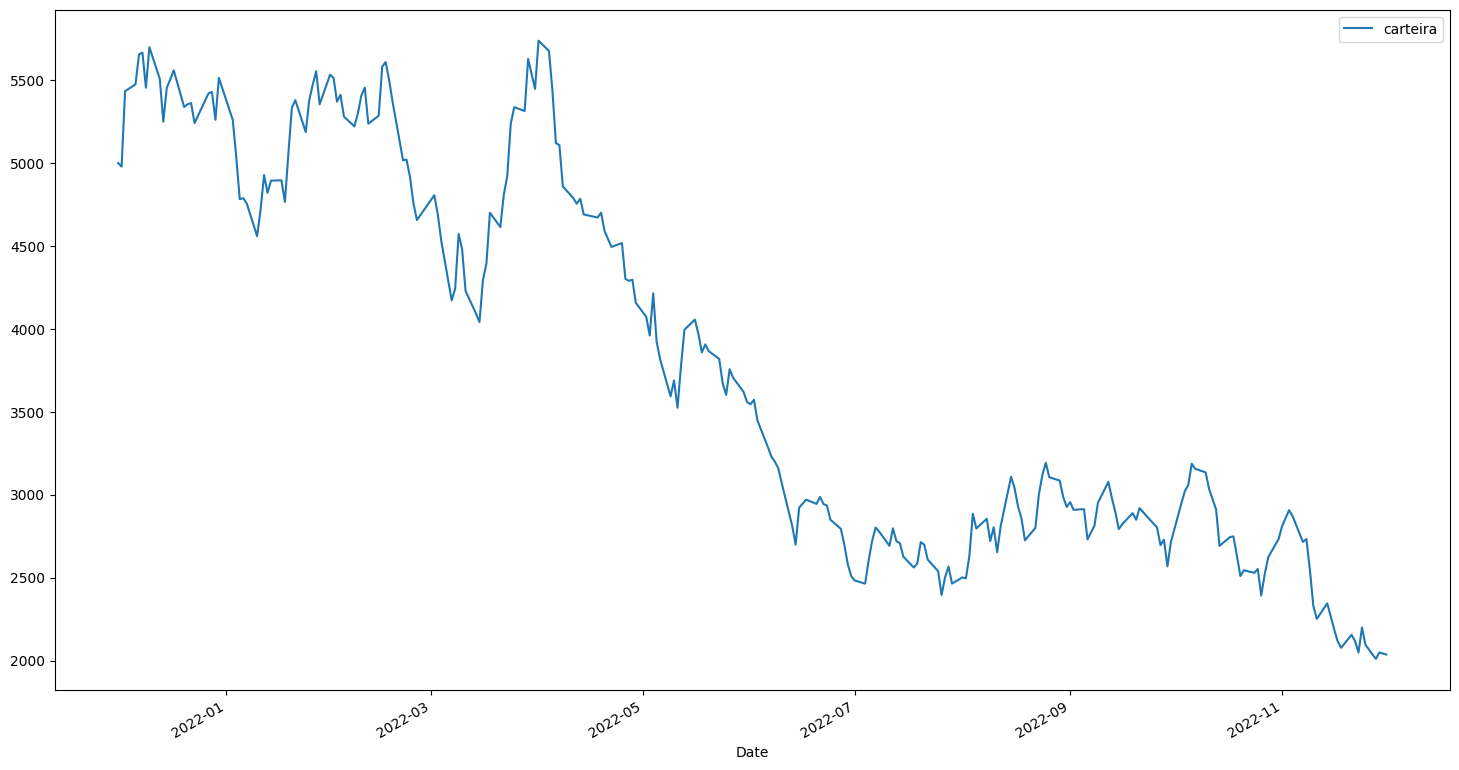

In [12]:
carteira_ativos['saldo'].plot(figsize=(18,10), label= "carteira")
plt.legend()

In [13]:
df_ibov.info

<bound method DataFrame.info of                 Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2022-01-03  104823.0  106125.0  103413.0  103922.0   103922.0  11128500
2022-01-04  103922.0  104276.0  103096.0  103514.0   103514.0  11491600
2022-01-05  103514.0  103514.0  100850.0  101006.0   101006.0         0
2022-01-06  101006.0  102235.0  101000.0  101561.0   101561.0  11749200
2022-01-07  101561.0  102719.0  101104.0  102719.0   102719.0  11733200
...              ...       ...       ...       ...        ...       ...
2022-11-22  109750.0  110224.0  107867.0  109037.0   109037.0  15056500
2022-11-23  109036.0  109285.0  107902.0  108683.0   108683.0  13198400
2022-11-24  108846.0  112612.0  108846.0  111831.0   111831.0  10296900
2022-11-25  111831.0  112025.0  108552.0  108977.0   108977.0  12309100
2022-11-28  108977.0  109476.0  108378.0  108782.0   108782.0  11492600

[227 rows x 6 columns]>

In [14]:
df_ibov = pd.read_csv('/Users/juliocarvalho/Desktop/PosMapa/Bolsab3/IBOVDia_10-11-22.csv', sep=';', skiprows=1, index_col=False)
df_ibov.drop(df_ibov.index[-2:], inplace=True)
df_ibov.tail()

,Codigo,Acao,Tipo,Qtde.STeorica,Part.(%)
87,VALE3,VALE,ON NM,4.547.296.398,"15,546"
88,VIIA3,VIA,ON NM,1.576.975.642,"0,206"
89,VBBR3,VIBRA,ON NM,1.114.442.976,"0,959"
90,WEGE3,WEG,ON NM,1.481.593.024,"2,811"
91,YDUQ3,YDUQS PART,ON NM,296.015.511,"0,190"


In [15]:
df_ibov.index

RangeIndex(start=0, stop=92, step=1)

In [16]:
df_ibov.rename(columns={
  'dodigo': 'codigo',
  'Aodigo': 'acao',
  'Qtde.STeorica': 'qtde_teorica',
  'Part.(%)': 'participacao'
},inplace=True)

In [17]:
df_ibov.describe(include='all')

,Codigo,Acao,Tipo,qtde_teorica,participacao
count,92,92,92,92,92
unique,92,89,17,92,89
top,RRRP3,BRADESCO,ON NM,200.453.863,"0,206"
freq,1,2,59,1,2


In [18]:
df_ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Codigo        92 non-null     object
 1   Acao          92 non-null     object
 2   Tipo          92 non-null     object
 3   qtde_teorica  92 non-null     object
 4   participacao  92 non-null     object
dtypes: object(5)
memory usage: 3.7+ KB


In [19]:
pd.to_numeric(df_ibov['qtde_teorica'])

ValueError: Unable to parse string "200.453.863" at position 0

In [ ]:
df_ibov['qtde_teorica'] =df_ibov['qtde_teorica'].str.replace('.', '').astype(float)

AttributeError: Can only use .str accessor with string values!

In [ ]:
df_ibov['participacao'] = df_ibov['participacao'].str.replace(',', '.').astype(float)

AttributeError: Can only use .str accessor with string values!

In [ ]:
df_ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo        92 non-null     object 
 1   Acao          92 non-null     object 
 2   Tipo          92 non-null     object 
 3   qtde_teorica  92 non-null     float64
 4   participacao  92 non-null     float64
dtypes: float64(2), object(3)
memory usage: 3.7+ KB


In [ ]:
df_ibov.loc[df_ibov['participacao'] > 5]

,codigo,Acao,Tipo,qtde_teorica,participacao
51,ITUB4,ITAUUNIBANCO,PN EJ N1,4.799907e+09,6.315
65,PETR4,PETROBRAS,PN N2,4.566441e+09,5.741
87,VALE3,VALE,ON NM,4.547296e+09,15.546


In [ ]:
df_ibov.loc[(df_ibov['participacao'] > 2) & (df_ibov['participacao'] < 5)]

,codigo,Acao,Tipo,qtde_teorica,participacao
2,ABEV3,AMBEV S/A,ON,4.386653e+09,3.379
7,B3SA3,B3,ON NM,5.901731e+09,4.204
12,BBDC4,BRADESCO,PN EJ N1,5.156077e+09,3.699
14,BBAS3,BRASIL,ON NM,1.420731e+09,2.461
31,ELET3,ELETROBRAS,ON N1,1.447696e+09,3.275
50,ITSA4,ITAUSA,PN N1,4.736060e+09,2.251
54,RENT3,LOCALIZA,ON NM,8.939782e+08,2.935
64,PETR3,PETROBRAS,ON N2,2.684385e+09,3.771
90,WEGE3,WEG,ON NM,1.481593e+09,2.811


In [ ]:
df_ibov['participacao'] > 5

0     False
1     False
2     False
3     False
4     False
      ...  
87     True
88    False
89    False
90    False
91    False
Name: participacao, Length: 92, dtype: bool

In [ ]:
df_ibov.iloc[[87, 88]]

,codigo,Acao,Tipo,qtde_teorica,participacao
87,VALE3,VALE,ON NM,4.547296e+09,15.546
88,VIIA3,VIA,ON NM,1.576976e+09,0.206


In [ ]:
df_estatistica = df_ibov.describe(include='all')
type(df_estatistica)

pandas.core.frame.DataFrame

In [ ]:
import sqlite3 as sql


conexao = sql.connect('Mapab.db')
df_estatistica.to_sql('df_estatistica', conexao)

11

In [ ]:
df_ibov.to_sql('ibov', conexao, if_exists='replace')

92

## Mataplotlib
#----------------------------------------------------------------


<AxesSubplot: >

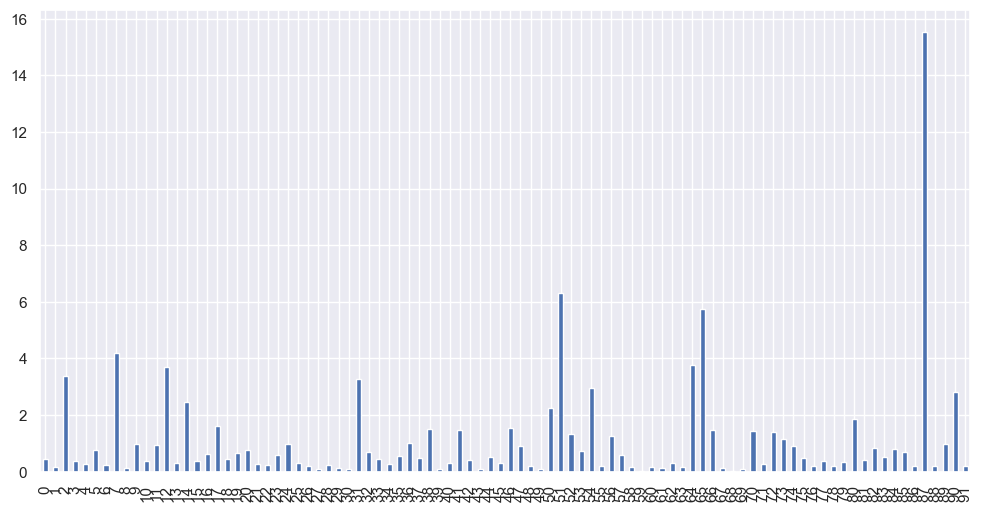

In [ ]:
df_ibov['participacao'].plot.bar()

In [ ]:
df_tempo = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')
df_tempo.head()

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0


In [ ]:
df_test =  pd.read_csv('https://gist.githubusercontent.com/chriddyp/9166432/raw/0d5410f1f8da88670adc86080e7154009ebf4906/indicator%2520gapminder%2520gdp_per_capita_ppp%2520-%2520Data.csv')
df_test.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,472.053500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,785.127571,804.717458,874.0,887.914578,983.652314,984.805841,1154.859365,1214.613653,1261.354184,1349.696941
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,601.215222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4855.210024,5115.252837,5369.0,5652.049321,5958.021197,6365.530359,6550.896164,6746.445312,6914.267317,6969.306283
4,Algeria,766.253664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5576.851564,5790.967692,6011.0,6022.270940,6133.782763,6162.719840,6173.729741,6300.648214,6354.640523,6419.127829


In [ ]:
df_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    748 non-null    int64  
 1   Month   748 non-null    int64  
 2   Tmax    748 non-null    float64
 3   Tmin    748 non-null    float64
 4   Rain    748 non-null    float64
 5   Sun     748 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 35.2 KB


In [ ]:
df_tempo.to_sql('tempo', conexao, if_exists='replace', index=False)

748

In [ ]:
df_clima_2018 = pd.read_sql('select * from tempo where year = 2018', conexao)
df_clima_2018 

,Year,Month,Tmax,Tmin,Rain,Sun
0,2018,1,9.7,3.8,58.0,46.5
1,2018,2,6.7,0.6,29.0,92.0
2,2018,3,9.8,3.0,81.2,70.3
3,2018,4,15.5,7.9,65.2,113.4
4,2018,5,20.8,9.8,58.4,248.3
5,2018,6,24.2,13.1,0.4,234.5
6,2018,7,28.3,16.4,14.8,272.5
7,2018,8,24.5,14.5,48.2,182.1
8,2018,9,20.9,11.0,29.4,195.0
9,2018,10,16.5,8.5,61.0,137.0


In [ ]:
df_clima_89 = pd.read_sql('select * from tempo where year = 1989', conexao)
df_clima_89 

,Year,Month,Tmax,Tmin,Rain,Sun
0,1989,1,9.5,3.1,26.0,59.2
1,1989,2,10.2,2.6,40.2,94.2
2,1989,3,12.9,4.5,56.6,100.0
3,1989,4,11.5,4.3,64.2,144.5
4,1989,5,21.0,10.0,12.1,310.1
5,1989,6,22.1,11.4,35.5,258.5
6,1989,7,25.8,14.8,36.7,274.8
7,1989,8,24.2,13.1,55.7,267.1
8,1989,9,20.7,12.6,10.8,131.2
9,1989,10,17.1,9.7,52.8,113.4


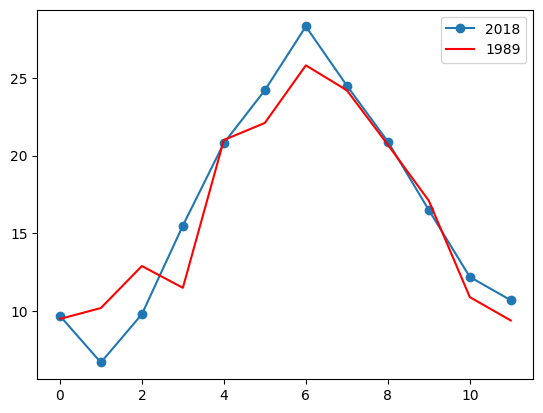

In [ ]:
ax_2018 = df_clima_2018.plot(y='Tmax', marker='o')
ax = df_clima_89.plot(y='Tmax', color='red', ax=ax_2018)
ax.legend(['2018','1989'])

In [ ]:
df_july = pd.read_sql('SELECT * FROM tempo WHERE month == 6', conexao)

In [ ]:
df_july.sort_values(by=['Tmax'], ascending=False, inplace=True)

<AxesSubplot: xlabel='Year'>

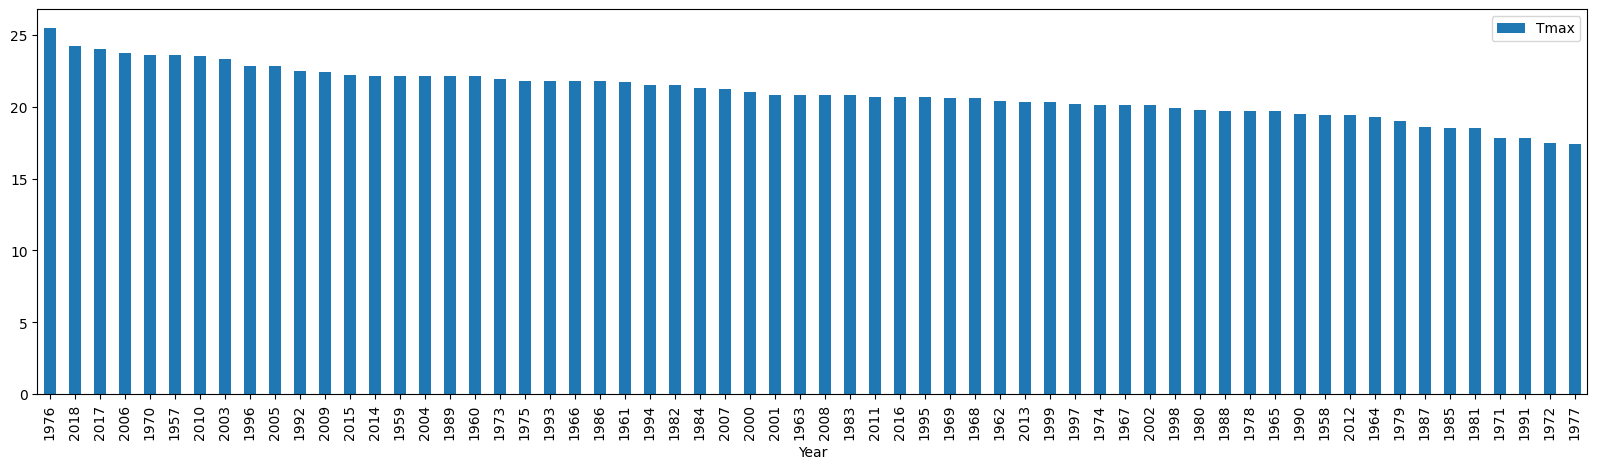

In [ ]:
df_july.plot.bar(x='Year', y='Tmax', figsize=(20,5))

In [ ]:
import seaborn as sns

sns.set(rc={"figure.figsize":(12,6)})

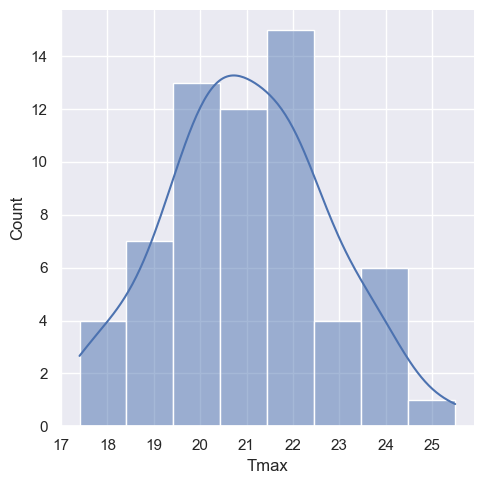

In [ ]:
sns.displot(df_july['Tmax'], kde=True)

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s %(message)s')
logging.warning('Watch out!')

2022-11-29 11:47:40,535 Watch out!
